In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import pareto
from scipy.interpolate import UnivariateSpline
from scipy import interpolate

import folium
from IPython.display import HTML
from IPython.display import IFrame

from matplotlib.backends.backend_pdf import PdfPages

from mpl_toolkits.basemap import Basemap

In [3]:
df=pd.read_excel('Grain_Size.xlsx',index_col='Sample',parse_dates=True)

In [5]:
df['sum_O']=abs(df.O)
df['sum_half']=abs(df.O)+abs(df.half)
df['sum_one']=abs(df.O)+abs(df.half)+abs(df.one)
df['sum_onehalf']=abs(df.O)+abs(df.half)+abs(df.one)+abs(df.onehalf)
df['sum_two']=abs(df.O)+abs(df.half)+abs(df.one)+abs(df.onehalf)+abs(df.two)
df['sum_twohalf']=abs(df.O)+abs(df.half)+abs(df.one)+abs(df.onehalf)+abs(df.two)+abs(df.twohalf)
df['sum_three']=abs(df.O)+abs(df.half)+abs(df.one)+abs(df.onehalf)+abs(df.two)+abs(df.twohalf)+abs(df.three)
df['sum_threehalf']=abs(df.O)+abs(df.half)+abs(df.one)+abs(df.onehalf)+abs(df.two)+abs(df.twohalf)+abs(df.three)+abs(df.threehalf)

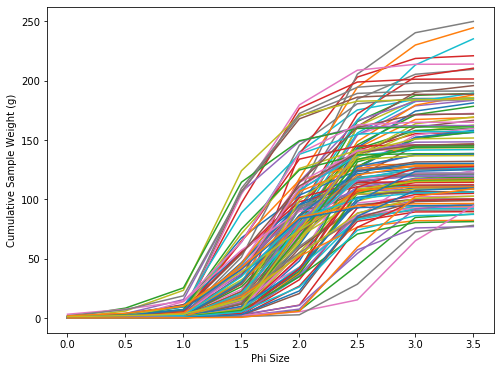

In [6]:
fig,ax=plt.subplots()
x=0,.5,1,1.5,2,2.5,3,3.5
y=df.sum_O,df.sum_half,df.sum_one,df.sum_onehalf,df.sum_two,df.sum_twohalf,df.sum_three,df.sum_threehalf
ax.plot(x,y)
fig.set_size_inches(8,6)
ax.set_xlabel('Phi Size')
ax.set_ylabel('Cumulative Sample Weight (g)')
fig.savefig('Cumulative frequency.jpg')

# Percentile

In [7]:
y=(0.480,2.017,10.035,36.608,75.575,101.711,108.613,108.836)
x=(0,0.5,1,1.5,2,2.5,3,3.5)
spl = UnivariateSpline(y, x)
b=spl(np.percentile(y,16))
c=spl(np.percentile(y,50))
d=spl(np.percentile(y,84))
z=(b+c+d)/3
print(z)

1.7544653872609028


In [8]:
cols=['sum_O','sum_half','sum_one','sum_onehalf','sum_two','sum_twohalf','sum_three','sum_threehalf']
df['sxth_percentile'] =df[cols].apply(lambda x: np.percentile(x, 16),axis=1)
df['fth_percentile'] =df[cols].apply(lambda x: np.percentile(x, 50),axis=1)
df['efth_percentile'] =df[cols].apply(lambda x: np.percentile(x, 84),axis=1)

In [9]:
for idx,row in df.iterrows():
   # print(idx,row)
    x=(row.sum_O,row.sum_half,row.sum_one,row.sum_onehalf,row.sum_two,row.sum_twohalf,row.sum_three,row.sum_threehalf)
    y=(0,0.5,1,1.5,2,2.5,3,3.5)
    spl = UnivariateSpline(x, y)
    df.at[idx,'sxth_int']=spl(row.sxth_percentile)
    df.at[idx,'fth_int']=spl(row.fth_percentile)
    df.at[idx,'efth_int']=spl(row.efth_percentile)
    df['mean']=(df.sxth_int+df.fth_int+df.efth_int)/3

# Map

In [10]:
mapName='meangrainsizemap.html'
location =[42.66,-70.73]
m = folium.Map(location=location,zoom_start=13)
color='red'
for index,row in df.iterrows():
    if row['mean']<1.5:
        color='blue'
        radius=5.5
    elif row['mean']<1.75:
        color='green'
        radius=5
    elif row['mean']<2:
        color='yellow'
        radius=4.5
    elif row['mean']<2.25:
        radius=4
        color='orange'
    elif row['mean']<2.5:
        radius=3.5
        color='red'
    else:
        radius=3
        color='black' 
            
    popuptext='sample {} has a mean grainsize of {:.2f} phi'.format(row.sample_number,row['mean'])
    location =[row.Latitude,row.Longitude]
    popup = folium.Popup(popuptext, parse_html=True)
    folium.CircleMarker(location,radius=radius,color=color,fill_color=color,popup=popup).add_to(m)
    
m
m.save(outfile=mapName)
IFrame(mapName, width=700, height=300)